In [66]:
import numpy as np # linear algebra
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [67]:
df=pd.read_csv("data/Walmart_sales.csv")
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


handle object

In [69]:
df["Date"] = pd.to_datetime(df['Date'], dayfirst=True)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [71]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Text(0.5, 1.0, 'Weekly Sales')

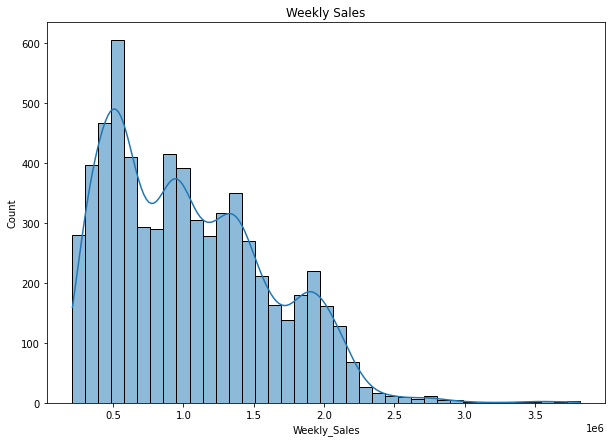

In [72]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weekly_Sales'],kde=True)
plt.title("Weekly Sales")

c:\Users\Rahul\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


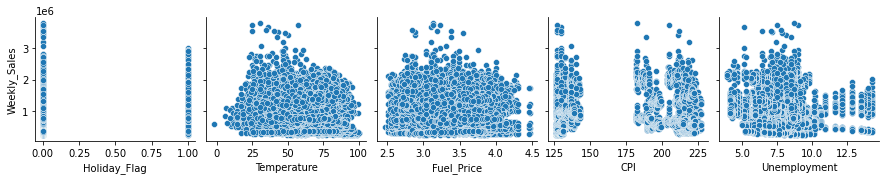

In [73]:
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

In [74]:
df = df.drop('Date', axis = 1)


In [75]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.9,0,42.31,2.572,211.096358,8.106


Text(0.5, 1.0, 'correlation matrix')

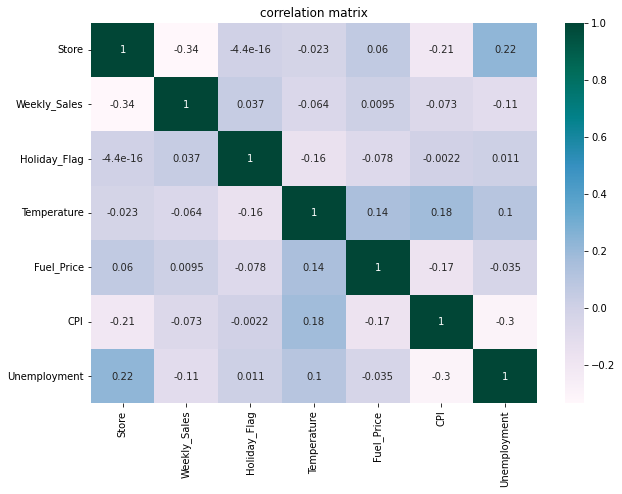

In [76]:
##Now let's find correlation
plt.figure(figsize=(10,7))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PuBuGn')
plt.title('correlation matrix')

so this headmap graph shows correlation between columns means each column is correlated with other and itself the value 1 in the heatmap shows it is correlated to itself or the column is more correlated to other column if the value is clogest to 1.

In [77]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

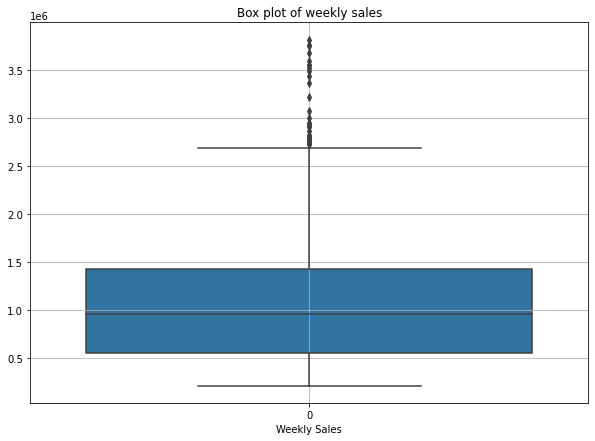

In [78]:
# box plot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Weekly_Sales'])
plt.xlabel("Weekly Sales")
plt.title("Box plot of weekly sales")
plt.grid(True)


In [79]:
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)

#fing IQR
IQR = Q3-Q1

lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5

In [80]:
lower_bound,upper_bound,IQR

(-746862.7275, 2720371.4924999997, 866808.5549999999)

In [81]:
data_without_outliers = df[(df["Weekly_Sales"]>=lower_bound ) & (df["Weekly_Sales"]<=upper_bound)]

In [82]:
data_without_outliers


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [83]:
X = data_without_outliers.drop('Weekly_Sales',axis=1)
y = data_without_outliers['Weekly_Sales']

In [84]:
#Now use sklearn train_test split
#random state 101,1234,42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [89]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [90]:
y_predict = LR.predict(X_test)

In [94]:
r2 = r2_score(y_predict, y_test)
mae = mean_absolute_error(y_predict, y_test)
mse = np.sqrt(mean_squared_error(y_predict, y_test))
print("r^2 score :", r2)
print(f'MAE:',mae)
print(f'MSE:',mse)
mean_squared_error(y_predict, y_test)

r^2 score : -4.696837040231763
MAE: 425060.33651296893
MSE: 504087.0011860391


254103704764.7338

In [104]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
rpred=rf.predict(X_test)
r2_score(rpred,y_test)


0.9496736117843182

In [107]:
mean_squared_error(rpred,y_test)


14264702897.632893

In [110]:
xg=XGBRegressor(n_estimators=200,random_state=42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [114]:
rpred=rf.predict(X_test)
r2_score(rpred,y_test)

0.9496736117843182